In [1]:
#import dependencies
#maybe comment this out a little more
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Bernt's code starts here

In [3]:
# Importing necessary dataframes

birthrate_csv = "../project-one/Resources/children_per_woman_total_fertility.csv"
birthrate_df = pd.read_csv(birthrate_csv)
birthrate_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [4]:
co2_csv = "../project-one/Resources/co2_emissions_tonnes_per_person.csv"
co2_df = pd.read_csv(co2_csv)
co2_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [5]:
income_csv = "../project-one/Resources/income_per_person_gdppercapita_ppp_inflation_adjusted.csv"
income_df = pd.read_csv(income_csv)
income_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [6]:
population_csv = "../project-one/Resources/population_total.csv"
population_df = pd.read_csv(population_csv)
population_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,71900000,71800000,71600000,71500000,71300000,71200000,71000000,70800000,70600000,70400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,1820000,1800000,1780000,1760000,1740000,1720000,1710000,1690000,1670000,1660000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,...,62800000,62800000,62800000,62800000,62800000,62800000,62700000,62700000,62600000,62600000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,64300,64200,64100,63900,63800,63700,63500,63400,63300,63100
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,156000000,158000000,160000000,162000000,164000000,166000000,167000000,169000000,171000000,173000000


In [7]:
#Bernt's code ends here

In [8]:
#Molly's code starts here

In [9]:
#Molly's code ends here

In [10]:
#Kaan's code starts here

In [11]:
#Kaan's code ends here

In [12]:
#Vallie's code starts here

In [13]:
#print out the birthrate df
birthrate_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [14]:
#print out the co2 dataframe
co2_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [16]:
#merge birthrate and co2 dataframes on country
co2_br_merge = pd.merge(co2_df, birthrate_df, on="country")
co2_br_merge.head()

,country,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [20]:
#rename columns
co2_br_rename = co2_br_merge.rename(columns={"country": "Country",
                                             "1974_x": "1974 CO2 Emissions",
                                             "1984_x": "1984 CO2 Emissions",
                                             "1994_x": "1994 CO2 Emissions",
                                             "2004_x": "2004 CO2 Emissions",
                                             "2014_x": "2014 CO2 Emissions",
                                             "1974_y": "Birthrate_1974",
                                             "1984_y": "Birthrate_1984",
                                             "1994_y": "Birthrate_1994",
                                             "2004_y": "Birthrate_2004",
                                             "2014_y": "Birthrate_2014"})

#make df with only the columns we want to keep
co2_br_df = co2_br_rename[["Country", "1974 CO2 Emissions", "1984 CO2 Emissions", "1994 CO2 Emissions", "2004 CO2 Emissions", "2014 CO2 Emissions",
                           "Birthrate_1974", "Birthrate_1984", "Birthrate_1994", "Birthrate_2004", "Birthrate_2014"]]
co2_br_df.head()

,Country,1974 CO2 Emissions,1984 CO2 Emissions,1994 CO2 Emissions,2004 CO2 Emissions,2014 CO2 Emissions,Birthrate_1974,Birthrate_1984,Birthrate_1994,Birthrate_2004,Birthrate_2014
0,Afghanistan,0.156,0.235,0.080,0.0394,0.299,7.45,7.46,7.57,6.99,4.98
1,Albania,1.840,2.700,0.613,1.3400,1.960,4.37,3.32,2.67,1.82,1.71
2,Algeria,1.960,3.250,3.050,2.7000,3.720,7.51,6.04,3.70,2.44,2.89
3,Angola,0.652,0.487,0.281,0.9960,1.290,7.61,7.39,6.99,6.50,5.84
4,Antigua and Barbuda,6.050,2.070,3.730,4.7800,5.380,2.91,2.10,2.17,2.25,2.08


In [21]:
#create 1974 dataframe, co2 descending order
df_1974 = co2_br_df[["Country", "1974 CO2 Emissions", "Birthrate_1974"]].sort_values("1974 CO2 Emissions", ascending=False).reset_index()
df_1974 = df_1974[["Country", "1974 CO2 Emissions", "Birthrate_1974"]]

#drop rows with nan values
df_1974 = df_1974.dropna()
df_1974

,Country,1974 CO2 Emissions,Birthrate_1974
0,Qatar,68.20000,6.58
1,United Arab Emirates,66.50000,6.25
2,Brunei,52.80000,5.56
3,Luxembourg,41.00000,1.63
4,Bahamas,39.90000,3.33
...,...,...,...
164,Maldives,0.02770,7.04
165,Burundi,0.02530,7.35
166,Rwanda,0.01740,8.34
167,Bhutan,0.01080,6.69


In [25]:
#run linear regression on co2 v birthrate (year 1974)

#perform a linear regression on co2 v birthrate (year 1974)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

0      1.591030
1      1.684783
2      2.440318
3      3.091071
4      3.151735
         ...   
164    5.350635
165    5.350768
166    5.351204
167    5.351567
168    5.351626
Name: 1974 CO2 Emissions, Length: 169, dtype: float64
y = -0.06x +5.35


The r-squared is: -0.2799233935911636


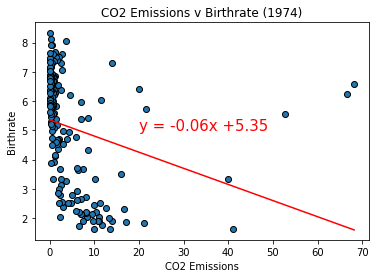

In [26]:
#create plot (co2 v birthrate, 1974)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (1974)")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save plot to images folder
plt.savefig(os.path.join("Images","1974_co2_v_birthrate.png"))

#show plot
plt.show()

In [15]:
#Vallie's code ends here